In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df= df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()

model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled,y_train,epochs=50,verbose=2,validation_split=0.2)

Epoch 1/50
200/200 - 2s - 11ms/step - accuracy: 0.7934 - loss: 0.5110 - val_accuracy: 0.7987 - val_loss: 0.4967
Epoch 2/50
200/200 - 1s - 3ms/step - accuracy: 0.7934 - loss: 0.4957 - val_accuracy: 0.7987 - val_loss: 0.4764
Epoch 3/50
200/200 - 0s - 1ms/step - accuracy: 0.7934 - loss: 0.4735 - val_accuracy: 0.7987 - val_loss: 0.4515
Epoch 4/50
200/200 - 0s - 2ms/step - accuracy: 0.7934 - loss: 0.4533 - val_accuracy: 0.7987 - val_loss: 0.4343
Epoch 5/50
200/200 - 0s - 1ms/step - accuracy: 0.7941 - loss: 0.4409 - val_accuracy: 0.8062 - val_loss: 0.4247
Epoch 6/50
200/200 - 0s - 1ms/step - accuracy: 0.8025 - loss: 0.4343 - val_accuracy: 0.8200 - val_loss: 0.4206
Epoch 7/50
200/200 - 0s - 2ms/step - accuracy: 0.8081 - loss: 0.4311 - val_accuracy: 0.8238 - val_loss: 0.4181
Epoch 8/50
200/200 - 0s - 2ms/step - accuracy: 0.8125 - loss: 0.4291 - val_accuracy: 0.8238 - val_loss: 0.4168
Epoch 9/50
200/200 - 1s - 3ms/step - accuracy: 0.8141 - loss: 0.4277 - val_accuracy: 0.8263 - val_loss: 0.4158


In [ ]:
model.layers[0].get_weights()

[array([[ 1.6919401e-01, -2.4143416e-01,  2.8144291e-01,  3.1491292e-03,
         -2.8909802e-01, -1.4010446e-01, -3.8591665e-01,  3.3507180e-01,
         -1.0020818e-01, -1.6974241e-01,  5.7941955e-02],
        [-2.4111514e+00,  1.4451811e+00,  3.7647581e-01, -6.3108492e-01,
          2.3542811e-01,  2.1153712e+00, -2.3370229e-01,  1.7258552e+00,
          4.4509682e-01,  1.6708654e-01,  2.0664101e+00],
        [-5.9547718e-03, -2.7731929e-02, -2.5770912e-01, -4.8873182e-02,
         -1.9549029e-01,  2.0715526e-01, -1.9458863e-01, -5.0526466e-02,
          2.2646233e-01,  1.5433660e-01, -7.9868846e-02],
        [ 2.8931800e-01,  5.0590473e-01,  4.0359977e-01, -7.4187315e-01,
         -1.6153440e-02,  8.0204181e-02,  1.0905766e+00,  3.7056974e-01,
          4.8375401e-01, -6.5647417e-01,  1.8629052e-01],
        [-3.3672181e-01,  5.9057057e-01, -8.1640083e-01, -3.3185098e+00,
         -6.2941587e-01, -2.3006476e-01,  9.8694795e-01,  5.6240654e-01,
         -7.0525473e-01, -7.6076269e-0

In [ ]:
ylog= model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_pred= np.where(ylog > 0.5,1,0)

In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8585

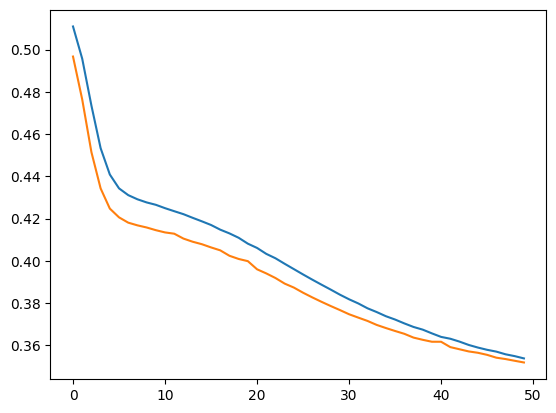

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

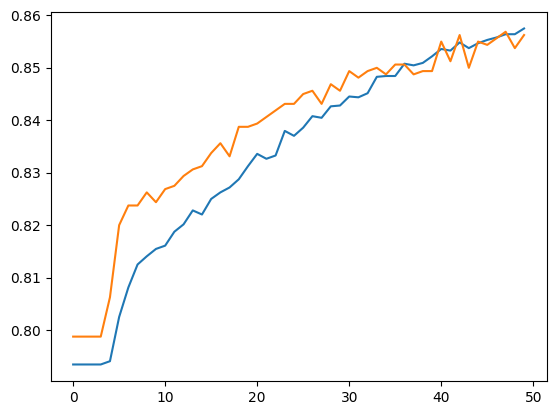

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()